<a href="https://colab.research.google.com/github/veeraseo/EDA-Titanic/blob/master/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##********************(TITANIC EDA)*****************************


# Import the necessary Libraries and Packages:

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
#%matplotlib inline

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import plotly as px
#warnings.filterwarnings('ignore')
%matplotlib inline

# Load the Dataset:

In [ ]:
#train=pd.read_csv('Downloads/train.csv')
#train.head()

In [ ]:
train = pd.read_csv('/content/Titanic - train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Univariate EDA:

## What is the Count of Survived vs Not Survived?

In [ ]:
#train.query('Survived==1').describe()
train.groupby(['Survived']).size()



Survived
0    549
1    342
dtype: int64

In [ ]:
#train.insert(0,'Sur_or_not','')

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Survived = train.groupby("Survived").size()
Survived

Survived
0    549
1    342
dtype: int64

In [ ]:
train['Sur_or_not'] = train['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Not Survived')
train.groupby(['Sur_or_not']).size()


Sur_or_not
Not Survived    549
Survived        342
dtype: int64

In [ ]:
train.groupby(['Sur_or_not']).size().sort_values()

Sur_or_not
Survived        342
Not Survived    549
dtype: int64

In [ ]:
train.groupby(['Sur_or_not']).size().sort_values(ascending = False)

Sur_or_not
Not Survived    549
Survived        342
dtype: int64

## Find out the Numerical Columns Basic Statistics:

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Visualize Survived vs Not Survived:

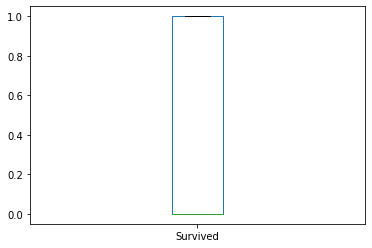

In [ ]:
train['Survived'].plot(kind='box')
#train['Sur_or_not'].plot(kind='box')--->Why it is giving error?


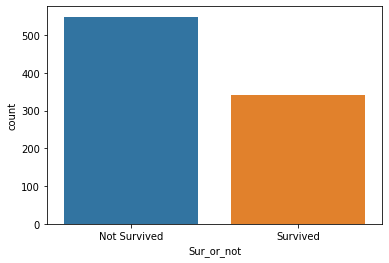

In [ ]:
sns.countplot(x='Sur_or_not', data=train);

#From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 342 are survived.i.e only 38.8% survived in 891.

In [ ]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
train.groupby(['Sex', 'Sur_or_not'])['Sur_or_not'].count()

Sex     Sur_or_not  
female  Not Survived     81
        Survived        233
male    Not Survived    468
        Survived        109
Name: Sur_or_not, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


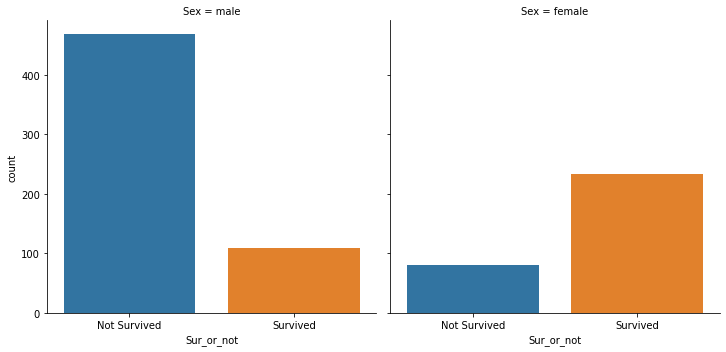

In [ ]:
sns.factorplot(x='Sur_or_not', col='Sex', kind='count', data=train);

#From the above graph we can say female survived more than male.

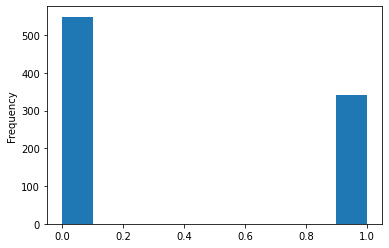

In [ ]:
  train['Survived'].plot(kind = 'hist')
#What is the difference between countplot and plot?

## Visual EDA for single Categorical Column: "Embarked"

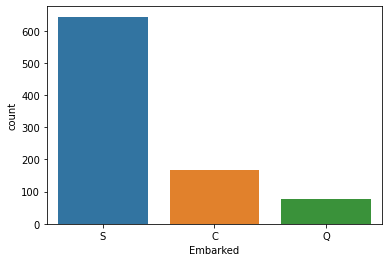

In [ ]:
sns.countplot(x='Embarked', data=train);

#From the above graph most of the people embarked from "Southampton" Than Cherbourg & Queenstown

## Visual EDA for single Continuous Column: "Fare" using Distribution Plot

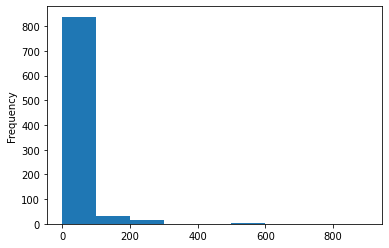

In [ ]:
#sns.countplot(x='Fare', data=train);
#sns.countplot('Fare',data=train);
#plt.show()
train['Fare'].plot(kind = 'hist',bins=[0, 100, 200, 300, 400, 500, 600,700,800,900])

In [ ]:
#sns.distplot(train['Fare']);
#sns.countplot(x='Fare', data=train);

#From the above distribution plot we can say most of the people who baught the ticket less than 100 fare.

## Visual EDA for single Continuous Column: "Fare" using KDE(Kernel Density Estimation) Plot

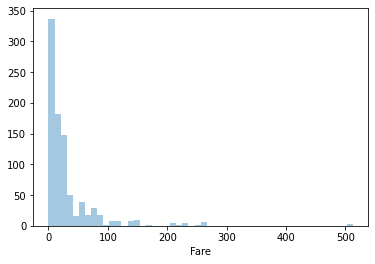

In [ ]:
sns.distplot(train.Fare, kde=False);

# Bivariate EDA:

##  What is the count of Males and Females Survived and Not Survived in each Class?

In [ ]:
#train.groupby(['Sur_or_not','Sex','Pclass']).size()
train.groupby(['Pclass','Sex','Sur_or_not']).size()
#train.head()

Pclass  Sex     Sur_or_not  
1       female  Not Survived      3
                Survived         91
        male    Not Survived     77
                Survived         45
2       female  Not Survived      6
                Survived         70
        male    Not Survived     91
                Survived         17
3       female  Not Survived     72
                Survived         72
        male    Not Survived    300
                Survived         47
dtype: int64

## Visualize Survived and Not Survived with respect to the 'Embarked' Column:

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


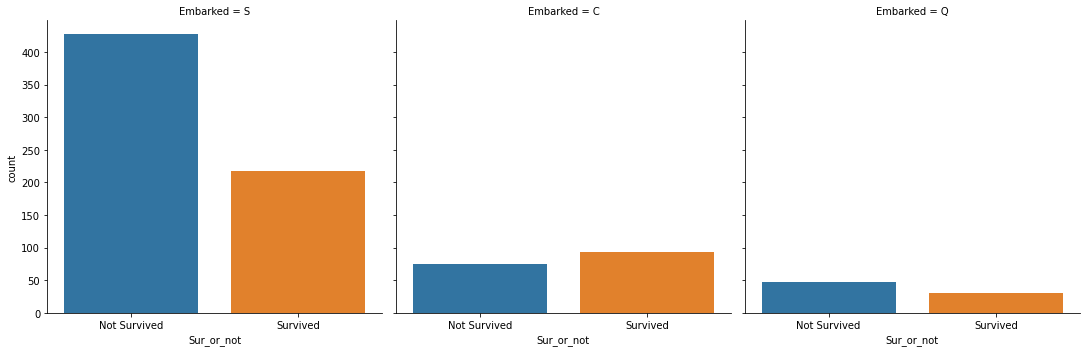

In [ ]:
sns.factorplot(x='Sur_or_not', col='Embarked', kind='count', data=train);
#how do we know we have to plot factorplot here?

From the above graph Most of the people survived from Southampton but if we see the percentage of survived then it is ore in 
Cherbourg compare to other 2('Southampton & Queenstown')

## Plot a Desnity Graph based on Fare and Survival Rate:

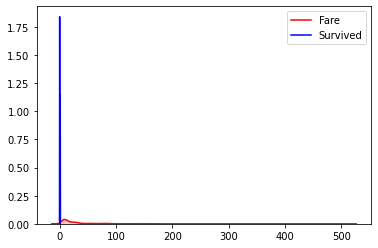

In [ ]:
p1=sns.kdeplot(train['Fare'], shade=True, color="r")
p1=sns.kdeplot(train['Survived'], shade=True, color="b")

#Density plot and Distribution plots are same?
#scattered plot....
fare vs survived-0
fare vs survived-1


#from the above we cant describe the final outcome hence showing scatter plot below

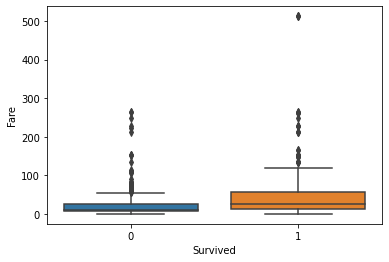

In [ ]:
# Draw the scatter plot


#plt.figure(figsize= (10,10))
#sns.scatterplot(data=train, x="Fare", y="Survived", alpha=0.3)
#plt.show()
#g.set(xscale="log");
#px.scatter(da=train, x='fare',y='survived')
#train[train['Fare'] < 100].plot.hexbin(y='Fare', x='Survived', gridsize=15)
sns.boxplot(x="Survived", y="Fare", data=train)

In [ ]:
#sns.distplot(train['Fare'],train['Survival_Rate'] kde=False);
#sns.distplot(train.Fare, kde=False);
#train['Sur_or_not'] = train['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Not Survived')
#train.groupby(['Sur_or_not']).size()
#p1=sns.kdeplot(train['Fare'], shade=True, color="r")
#p1=sns.kdeplot(train['Survival_Rate'], shade=True, color="b")


## Plot a Distplot based on Fare and Survival Rate:

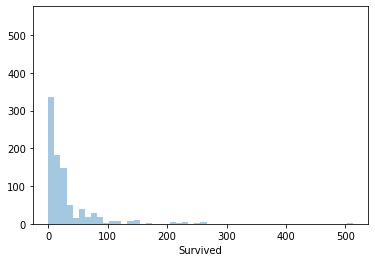

In [ ]:
#Write your code here
sns.distplot(train.Fare, kde=False);
sns.distplot(train.Survived, kde=False);-----it should not be


In [ ]:
#Write your code here

## How are "Age" and "Fare" Columns related? Plot a Graph for the same:

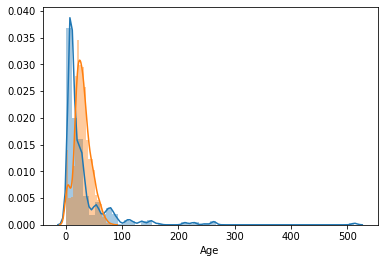

In [ ]:
#sns.factorplot(x='Age', col='Fare', data=train);
#sns.factorplot(x='Sur_or_not', col='Sex', kind='count', data=train);
#sns.countplot('Age', hue='Fare', data=train)
#plt.title('Pclass: Sruvived vs Dead')
#plt.show()

sns.distplot(train.Fare, kde=True);
sns.distplot(train.Age, kde=True);

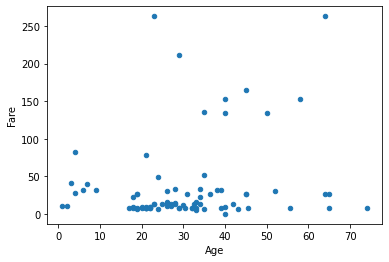

In [ ]:
train[train['Fare'] < 512].sample(100).plot.scatter(x='Age', y='Fare')

#Majority of the people age between 18 to 35 have tickets fare less than 50.

# Multivariate EDA:

## Does Age have an impact on Survival Rate for each Sex and Class group?

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


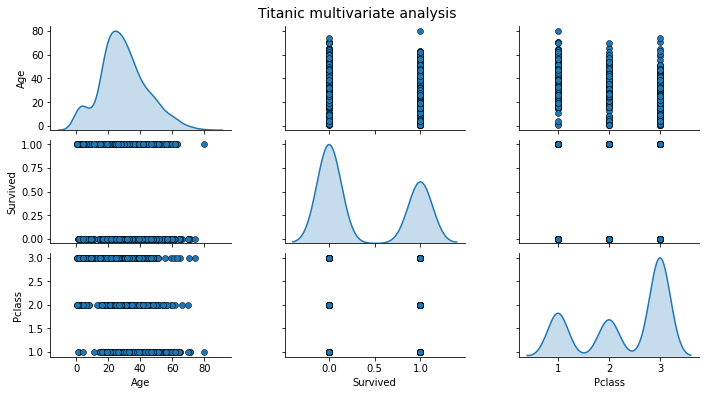

In [ ]:
#sns.jointplot(x="Age", y="Survived", data=train);
#ax = data[["Age","Sex","Survived","PClass"]].plot()
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# Pair-wise Scatter Plots
cols = ["Age","Sex","Survived","Pclass"]
pp = sns.pairplot(train[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Titanic multivariate analysis', fontsize=14)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


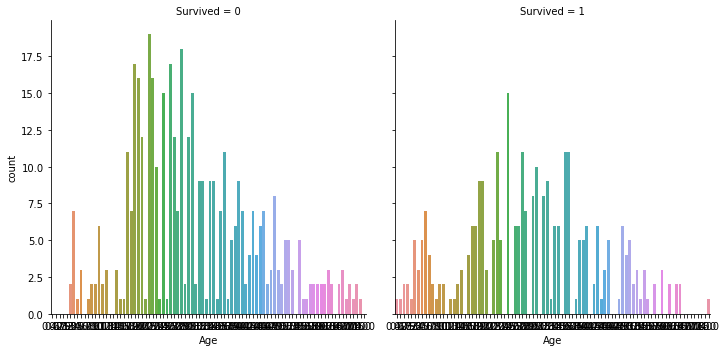

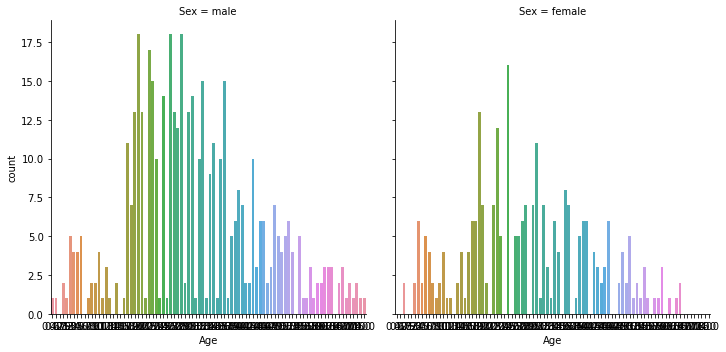

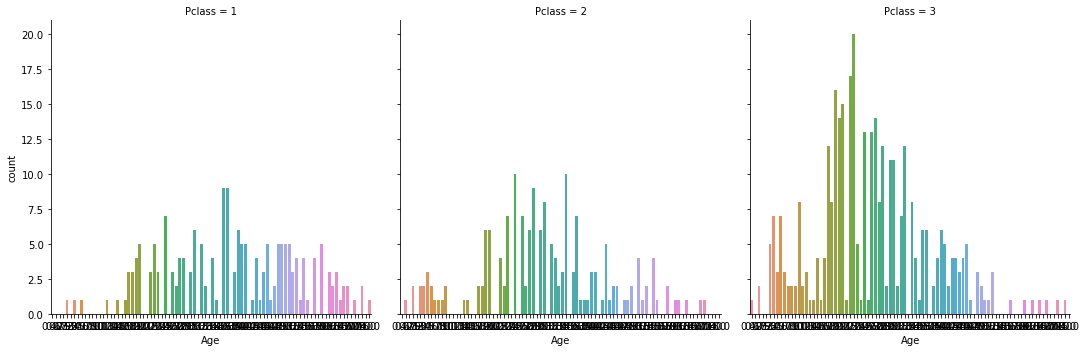

In [ ]:
sns.factorplot(x='Age', col='Survived', kind='count', data=train);
sns.factorplot(x='Age', col='Sex', kind='count', data=train);
sns.factorplot(x='Age', col='Pclass', kind='count', data=train);

#Search for HIstogram


In [ ]:
#Write your code here

In [ ]:
#Write your code here

## Plot a HEATMAP showing the correlations between different features:

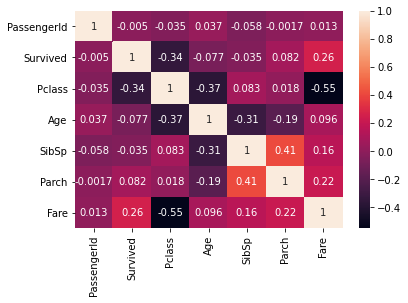

In [ ]:
#Write your code here
sns.heatmap(train.corr(),annot=True);

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sur_or_not   891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


# Conclusion

In [ ]:
#Conclude your findings about the dataset
#
Positive Corelation:
1)From the above heat map there is strong co relation between Survived and Fare.
2)Parch vs sibsp corelation is there.

Negative Corelation:
Heighest negative corelation between Fare vs Pclass
and negative corelation between survived vs Pclass.
and age vs pclass.
